# 데이터 준비

In [84]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# train_test_split

In [85]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [86]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

# 학습

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_poly, train_target)

LinearRegression()

In [88]:
print("train : ", lr.score(train_poly, train_target))
print("test : ", lr.score(test_poly, test_target))

train :  0.9706807451768623
test :  0.9775935108325121


In [89]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


# 시각화

In [90]:
import matplotlib.pyplot as plt

lr.predict([[50**2, 50]])

array([1573.98423528])

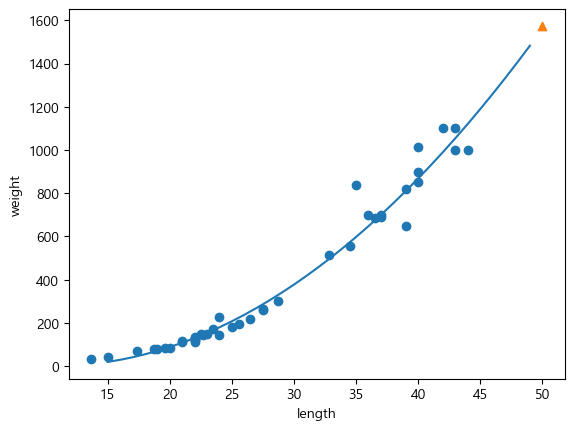

In [91]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2-21.6*point+116.05)

plt.scatter(50,1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 규제(regularization)

In [92]:
import pandas as pd

df = pd.read_csv("https://bit.ly/perch_csv_data")
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [93]:
perch_full = df.to_numpy()

## train_test_split

In [94]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 변환기
    - PolynomialFeatures : 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.

In [95]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 9)


In [96]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

## 훈련

In [97]:
lr.fit(train_poly, train_target)

print('train : ', lr.score(train_poly, train_target))
print('test : ', lr.score(test_poly, test_target))

train :  0.9903183436982124
test :  0.971455991159408


## 문제점

In [98]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [99]:
lr.fit(train_poly, train_target)

print('train : ', lr.score(train_poly, train_target))
print('test : ', lr.score(test_poly, test_target))

train :  0.999999999999586
test :  -144.405781301649


## 정규화

In [100]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지(ridge)
    - 계수를 제곱한 값을 기준으로 규제를 적용
    - solver 매개변수에 최적의 모델을 찾기 위한 방법을 지정할 수 있다.
    - sag : 확률적 평균 경사하강법으로 특성과 샘플 수가 많을 때 성능이 빠르고 좋다.(혹은 saga)

In [101]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)

print("train : ", ridge.score(train_scaled, train_target))
print("test : ", ridge.score(test_scaled, test_target))

train :  0.9896101671037343
test :  0.9790693977615388


In [102]:
# alpha 값이 크면 규제 강도가 세진다 -> 과소적합되도록 유도

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

In [103]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

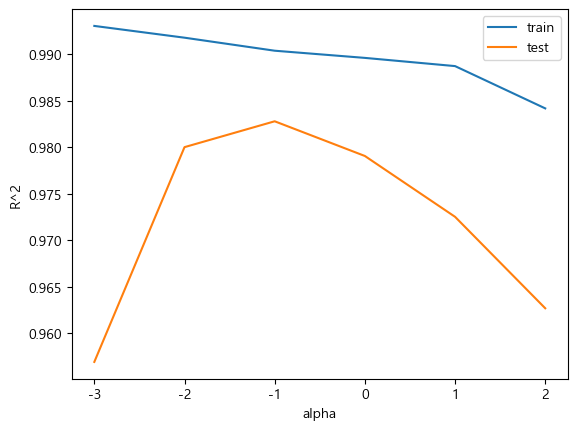

In [104]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [105]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print("train : ", ridge.score(train_scaled, train_target))
print("test : ", ridge.score(test_scaled, test_target))

train :  0.9903815817570364
test :  0.9827976465386874


## 라쏘(lasso)
    - 계수의 절댓값을 기준으로 규제를 적용
    - 최적의 모델을 찾기 위해 좌표축을 따라 최적화를 수행해가는 좌표 하강법을 사용

In [106]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)

print("train : ", lasso.score(train_scaled, train_target))
print("test : ", lasso.score(test_scaled, test_target))

train :  0.989789897208096
test :  0.9800593698421886


In [107]:
# alpha 값이 크면 규제 강도가 세진다 -> 과소적합되도록 유도

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list :
    lasso = Lasso(alpha=alpha, max_iter=10000) # ConvergenceWarning 오류가 뜬다면 max_iter 값을 늘려주면 된다!
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.69795779461, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.82134540023, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


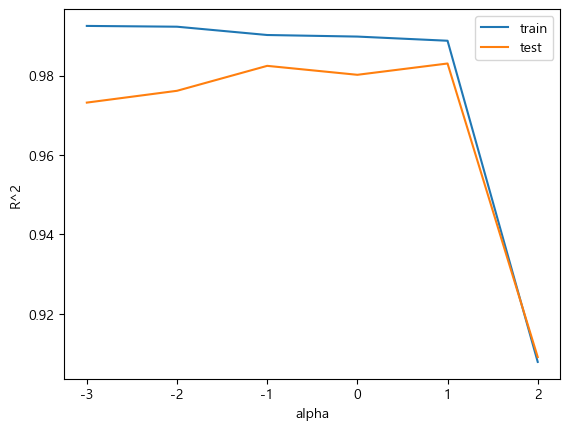

In [108]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [109]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print("train : ", lasso.score(train_scaled, train_target))
print("test : ", lasso.score(test_scaled, test_target))

train :  0.9888067471131866
test :  0.9824470598706696
